### set `folder_name`

In [7]:
name = "ANA1"

### imports and plot settings

In [8]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.sort_folders import sort_folders_by_day

### Setup folders

In [9]:
output_folder = "../Data_Copy/AnalysisData/"+name+"/CumulativePathVariance_"+name+"/"
!mkdir {output_folder}

Path_folders = sort_folders_by_day('../Data_Copy/AnalysisData/'+name+'/Path_'+name+'_*/')

mkdir: ../Data_Copy/AnalysisData/ANA1/CumulativePathVariance_ANA1/: File exists


['../Data_Copy/AnalysisData/ANA1/Path_ANA1_20231128_d12/', '../Data_Copy/AnalysisData/ANA1/Path_ANA1_20231211_d21/']


### get `movements_var_ps` and calculate `cumulative_var_p`

$\int\limits_{0}^{100} Var_p(p) dp$ where $p =$ % movement completed. Save to `cumulative_var_ps`, a list of all `cumulative_var_p`'s from all days.

Sticking with num_samples of 10*10000 as explained in Path

In [10]:
num_samples = 10*10000

cumulative_var_ps = []
for Path_folder in Path_folders:
    var_p = np.load(Path_folder+"var_p.npy")

    # Compute the area using the composite trapezoidal rule.
    cumulative_var_p = np.trapz(var_p, dx=(100/num_samples))
    print("cumulative_var_p: ", cumulative_var_p)
    cumulative_var_ps.append(cumulative_var_p)

cumulative_var_ps = np.array(cumulative_var_ps)

cumulative_var_p:  1.6019808758074185
cumulative_var_p:  6.422758352063383


### plot `cumulative_var_p` over days

([<matplotlib.axis.XTick at 0x1767806d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

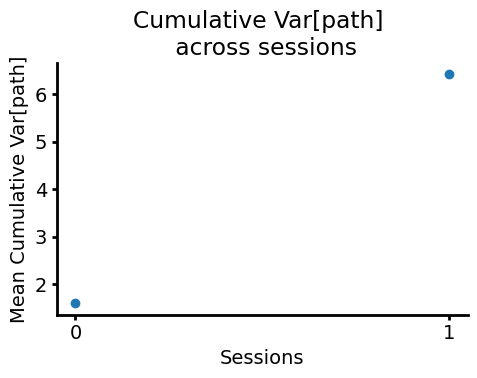

In [11]:
set_matplotlib_settings()

plt.scatter(range(0,len(cumulative_var_ps)),cumulative_var_ps)
plt.title("Cumulative Var[path] \n across sessions")
plt.ylabel("Mean Cumulative Var[path]")
plt.xlabel("Sessions")
plt.xticks(range(0,len(cumulative_var_ps)))

### save `cumulative_var_ps`

In [12]:
np.save(output_folder+"cumulative_var_ps", cumulative_var_ps)